### Importing Libraries

In [1]:
!pip install tweet-preprocessor

You should consider upgrading via the '/opt/conda/bin/python3.7 -m pip install --upgrade pip' command.


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow.keras.layers import Dense,Flatten,Embedding,Bidirectional,LSTM,Dropout,BatchNormalization
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

import nltk
from nltk.tokenize import sent_tokenize
from nltk.corpus import words
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer

import re
import os
import preprocessor as p
from textblob import TextBlob

In [3]:
nltk.download("stopwords")
nltk.download("wordnet")

[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /usr/share/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

### Data Preprocessing

In [4]:
df = pd.read_csv("../input/full-biden-dataset/Biden_No_Retweet_Full_Text.csv",engine="python", encoding= "utf-8",error_bad_lines=False) #Reading CSV

In [5]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15098 entries, 0 to 15097
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Date       15098 non-null  object
 1   Tweet_id   15098 non-null  int64 
 2   Verified   15098 non-null  bool  
 3   Tweet      15098 non-null  object
 4   User       15098 non-null  object
 5   Location   11032 non-null  object
 6   Source     15098 non-null  object
 7   Likes      15098 non-null  int64 
 8   Followers  15098 non-null  int64 
 9   Following  15098 non-null  int64 
 10  Retweets   15098 non-null  int64 
dtypes: bool(1), int64(5), object(5)
memory usage: 1.2+ MB


In [6]:
df.head(10)

,Date,Tweet_id,Verified,Tweet,User,Location,Source,Likes,Followers,Following,Retweets
0,2020-07-21 23:59:43,1285726179907993601,False,@JoeBiden VP Biden I wish you wouldn't debate ...,BballmomEjZay,United States,Twitter for Android,0,54,192,0
1,2020-07-21 23:59:27,1285726110513344520,False,"#GeorgeWill , it’s so sad you wake up everyday...",TalbotMac,"East Aurora, NY",Twitter for iPhone,0,882,1554,0
2,2020-07-21 23:59:24,1285726099239055361,False,Question:\nIf @JoeBiden doesn’t pick a woman o...,bk_middleclass,"Nashville, TN",Twitter for iPhone,0,1294,1213,0
3,2020-07-21 23:58:47,1285725945849151490,False,Right? 🤣🤣🤣 #Biden formally implicated in #Ukra...,MMorganBlair,United States,Twitter for iPhone,1,2476,3334,1
4,2020-07-21 23:58:02,1285725754961965056,False,These idiots let Trump do anything he wants. W...,realfacade1,Purgatory,Twitter for Android,0,2764,3799,0
5,2020-07-21 23:57:22,1285725587089362946,False,How could #Biden be +4 in #Ohio and +3 in #Pen...,bradpomerance,Los Angeles,Twitter for iPhone,0,2722,1406,0
6,2020-07-21 23:56:58,1285725486749032449,False,@mamendoza480 There was never teaching any rel...,UsecommonSentz,United States,Twitter Web App,0,403,781,0
7,2020-07-21 23:56:55,1285725476779102209,False,@chick_right @MSNBC @JoeNBC In your dreams @ch...,amauney28,"Maryland, USA",Twitter for iPhone,0,78,958,0
8,2020-07-21 23:56:19,1285725322399420416,False,Joy is on a one woman mission to expose #45 fo...,JanetThoma,Chicago,Twitter Web App,0,2617,4989,0
9,2020-07-21 23:56:05,1285725266065719296,False,I slept better with OBAMA and BIDEN \nnow JOE ...,RealMiddleClass,"Los Angeles, CA",Twitter Web App,1,375,815,0


In [7]:
df.drop_duplicates(subset = "Tweet", keep = "first",inplace = True,ignore_index = True) #Removing duplicates

#### Cleaning

In [8]:
tweet_list = []
for x in df["Tweet"]:
    tweet_list.append(p.clean(x)) #Cleaning tweets (Removes URLs, Hashtags, Mentions, Reserved Words (RT,FAV) Emojis, Smileys) and appending to a list
    
tweet_list = [re.sub('[^a-zA-Z]', ' ',i) for i in tweet_list] #Removing punctuatuons

In [9]:
print("----Before----")
print(df["Tweet"][3])

print("----After----")
print(tweet_list[3])

----Before----
Right? 🤣🤣🤣 #Biden formally implicated in #Ukraine scandal @ChanelRion reported this afternoon 
 #Burisma https://t.co/B13j0IR6er
----After----
Right  formally implicated in scandal reported this afternoon


#### Removing Stopwords

In [10]:
clean_tweets = []
for tweet in tweet_list: 
        for word in set(stopwords.words("english")):
            token = " "+word+" "
            tweet = tweet.replace(token, " ")
        clean_tweets.append(tweet)

In [11]:
clean_tweets[:5]

['VP Biden I wish debate Trump unless  Debate Trump shows taxesDebate Tells Putin stop killing soldiersDebate Put sanctions Putin election hacks amp  I wish publicly challenge   Rice',
 '  sad wake everyday forgetting YOU George Will    like Swampers badly need disinfect  Youre new breed SenileElites  Same man plan vote for',
 'Question If doesnt pick woman color  would black community hold ',
 'Right  formally implicated scandal reported afternoon',
 'These idiots let Trump anything wants  When Biden gets elected  I want hear word  I hope come like ']

#### Stemming

In [12]:
stemmed = []
for word in clean_tweets:
    stemmed.append(PorterStemmer().stem(word))

In [13]:
stemmed[:5]

['vp biden i wish debate trump unless  debate trump shows taxesdebate tells putin stop killing soldiersdebate put sanctions putin election hacks amp  i wish publicly challenge   ric',
 '  sad wake everyday forgetting you george will    like swampers badly need disinfect  youre new breed senileelites  same man plan vote for',
 'question if doesnt pick woman color  would black community hold ',
 'right  formally implicated scandal reported afternoon',
 'these idiots let trump anything wants  when biden gets elected  i want hear word  i hope come like ']

In [14]:
df["Processed"] = stemmed

### Tfidf Vectorizer

In [15]:
from sklearn.feature_extraction.text import TfidfVectorizer

vector = TfidfVectorizer(ngram_range=(1,1), max_features=150).fit(df["Processed"]) 

trans = vector.transform(df["Processed"])  # Transforming the vectorizer

df_vect=pd.DataFrame(trans.toarray(), columns=vector.get_feature_names()) # Converting to DataFrame

df_vect.head(10)

,all,already,also,america,american,americans,amp,and,another,anyone,...,will,win,wins,work,world,would,years,yes,you,your
0,0.0,0.0,0.0,0.000000,0.0,0.0,0.290424,0.0,0.0,0.000000,...,0.00000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0
1,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,...,0.38738,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.299598,0.0
2,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,...,0.00000,0.0,0.0,0.0,0.0,0.516294,0.0,0.0,0.000000,0.0
3,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,...,0.00000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0
4,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,...,0.00000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0
5,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.530189,...,0.00000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0
6,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,...,0.00000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0
7,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,...,0.00000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0
8,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,...,0.00000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0
9,0.0,0.0,0.0,0.284088,0.0,0.0,0.000000,0.0,0.0,0.000000,...,0.00000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0


### Sentiment Analysis using TextBlob

In [16]:
pol = []

for tweet in df["Processed"]:
    blob = TextBlob(tweet)
    pol.append(blob.sentiment.polarity)
df['Polarity']=pol

In [17]:
df.head(5)

,Date,Tweet_id,Verified,Tweet,User,Location,Source,Likes,Followers,Following,Retweets,Processed,Polarity
0,2020-07-21 23:59:43,1285726179907993601,False,@JoeBiden VP Biden I wish you wouldn't debate ...,BballmomEjZay,United States,Twitter for Android,0,54,192,0,vp biden i wish debate trump unless debate tr...,0.000000
1,2020-07-21 23:59:27,1285726110513344520,False,"#GeorgeWill , it’s so sad you wake up everyday...",TalbotMac,"East Aurora, NY",Twitter for iPhone,0,882,1554,0,sad wake everyday forgetting you george will...,-0.252727
2,2020-07-21 23:59:24,1285726099239055361,False,Question:\nIf @JoeBiden doesn’t pick a woman o...,bk_middleclass,"Nashville, TN",Twitter for iPhone,0,1294,1213,0,question if doesnt pick woman color would bla...,-0.166667
3,2020-07-21 23:58:47,1285725945849151490,False,Right? 🤣🤣🤣 #Biden formally implicated in #Ukra...,MMorganBlair,United States,Twitter for iPhone,1,2476,3334,1,right formally implicated scandal reported af...,-0.057143
4,2020-07-21 23:58:02,1285725754961965056,False,These idiots let Trump do anything he wants. W...,realfacade1,Purgatory,Twitter for Android,0,2764,3799,0,these idiots let trump anything wants when bi...,-0.300000


#### Segregating into Positive, Negative and Neutral

In [18]:
positive ,negative, neutral = 0,0,0

for polar in df["Polarity"]:
    if polar > 0:
        positive += 1
    elif polar < 0:
        negative += 1
    else:
        neutral += 1
        
pol_list = []

for x in pol:
    if x>0:
        pol_list.append("Positive")
    elif x<0:
        pol_list.append("Negative")
    else:
        pol_list.append("Neutral")
        
df["Sentiment"] = pol_list

In [19]:
print("Positive :",positive)
print("Negative :",negative)
print("Neutral :",neutral)

Positive : 6029
Negative : 3608
Neutral : 5409


In [20]:
sentences = list(df.Processed)
labels = df.Sentiment.tolist()

### NLP

In [21]:
#Converting any float values in the processed tweets into string

ctr2 = 0 
for x in sentences:
    if type(x) == float:
        ctr2 += 1
        sentences[sentences.index(x)] = "nan"                

#### HyperParameters

In [22]:
embedding_dim = 150 
max_length = 200
trunc_type='post'
padding_type='post'
oov_tok = "<OOV>"
training_portion = .8

#### Splitting Data

In [23]:
train_size = round(training_portion * len(sentences)) 

train_sentences = sentences[:train_size]
train_labels = np.array(labels[:train_size])

validation_sentences = sentences[train_size:]
validation_labels = np.array(labels[train_size:])

#### One Hot Encoding

In [24]:
from sklearn.preprocessing import OneHotEncoder
onehot_encoder = OneHotEncoder(sparse=False)

# One hot encoding for training set
integer_encoded_train = train_labels.reshape(len(train_labels), 1)
onehot_encoded_train = onehot_encoder.fit_transform(integer_encoded_train)

# One hot encoding for validation set
integer_encoded_val = validation_labels.reshape(len(validation_labels), 1)
onehot_encoded_val = onehot_encoder.fit_transform(integer_encoded_val)

In [25]:
print(onehot_encoder.categories_)

[array(['Negative', 'Neutral', 'Positive'], dtype='<U8')]


In [26]:
vocab_size = len(set(" ".join(train_sentences).split()))
vocab_size

15995

#### Tokenizing

In [27]:
tokenizer = Tokenizer(num_words = vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(train_sentences)
word_index = tokenizer.word_index

train_sequences = tokenizer.texts_to_sequences(train_sentences)
train_padded = np.array(pad_sequences(train_sequences,maxlen=max_length,truncating=trunc_type,padding=padding_type))

In [28]:
validation_sequences = tokenizer.texts_to_sequences(validation_sentences)
validation_padded = np.array(pad_sequences(validation_sequences, padding=padding_type, maxlen=max_length))

print(len(validation_sequences))
print(validation_padded.shape)

3009
(3009, 200)


### Defining Model

In [38]:

model = tf.keras.Sequential([
    
    Embedding(vocab_size,embedding_dim,input_length = max_length),
    Bidirectional(LSTM(256)),
    Dropout(0.5),
    BatchNormalization(),
    Dropout(0.5),
    Flatten(),
    Dense(64,activation='relu'),
    Dropout(0.5),
    Dense(3,activation='softmax')
    
])
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 200, 150)          2399250   
_________________________________________________________________
bidirectional_2 (Bidirection (None, 512)               833536    
_________________________________________________________________
dropout_6 (Dropout)          (None, 512)               0         
_________________________________________________________________
batch_normalization_2 (Batch (None, 512)               2048      
_________________________________________________________________
dropout_7 (Dropout)          (None, 512)               0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 512)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 64)               

In [39]:
model.compile(optimizer = tf.keras.optimizers.Adam(lr=9e-4),loss='categorical_crossentropy',metrics=['accuracy'])

In [40]:
#Training the Model


history = model.fit(train_padded,
                    onehot_encoded_train,
                    epochs=7,
                    validation_data=(validation_padded,onehot_encoded_val))

Epoch 1/7
377/377 [==============================] - 25s 68ms/step - loss: 0.9401 - accuracy: 0.5726 - val_loss: 0.8438 - val_accuracy: 0.5989
Epoch 2/7
377/377 [==============================] - 25s 67ms/step - loss: 0.4640 - accuracy: 0.8224 - val_loss: 0.5446 - val_accuracy: 0.8106
Epoch 3/7
377/377 [==============================] - 25s 65ms/step - loss: 0.2184 - accuracy: 0.9272 - val_loss: 0.6041 - val_accuracy: 0.8382
Epoch 4/7
377/377 [==============================] - 25s 66ms/step - loss: 0.1416 - accuracy: 0.9583 - val_loss: 0.6216 - val_accuracy: 0.8425
Epoch 5/7
377/377 [==============================] - 25s 66ms/step - loss: 0.0950 - accuracy: 0.9719 - val_loss: 0.6854 - val_accuracy: 0.8471
Epoch 6/7
377/377 [==============================] - 25s 66ms/step - loss: 0.0804 - accuracy: 0.9759 - val_loss: 0.7682 - val_accuracy: 0.8305
Epoch 7/7
377/377 [==============================] - 26s 68ms/step - loss: 0.0684 - accuracy: 0.9812 - val_loss: 0.7122 - val_accuracy: 0.8548

## Results

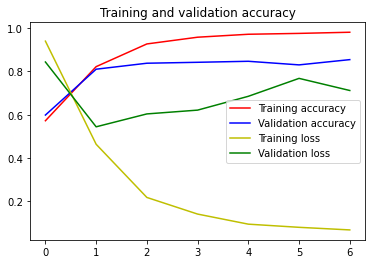

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

In [41]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'g', label='Validation loss')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()

plt.show()
plt.savefig('plot.png')

In [42]:
import preprocessor as p

# Tweets for testing the model's actual accuracy


test_tweet = ["As we come closer to #JoeBiden's #VPselection,  I'll support his campaign regardless of who he chooses.  The far right is going to attack whomever he chooses, but his selection will be vastly more qualified than Dan Quayle, Sarah Palin, etc.",
              "So what is Trump doing about Russians' placing a bounty on our American soldiers? Please answer this question immediately",
              "His Plan all along, Dictatorship not in My Country your A$$ is out #JoeBidenPresident is in. Unite Vote Blue America’s Democracy depends on it .",
              "think spreading the is something we all need right now. It would make the World a happier. #JoeBidenPresident #Biden2020 little drawing I made of it",
              "Real Leaders can shut the fuck up every now and then. I've always liked Joe Biden and he wasn't my first choice in the primary but he's grown on me, he's a beautiful person, and I am so proud to be able to vote for him."
             ,"what is biden in front of trump? little bag of scum" ]

test_tweet_clean = []

for line in test_tweet:
    test_tweet_clean.append(p.clean(line))


for i,line in enumerate(test_tweet_clean):             
        for word in stopwords.words("english"):
            token = " "+word+" "
            line = line.replace(token, " ")
        test_tweet_clean[i] = line



a = tokenizer.texts_to_sequences(test_tweet_clean)
a1 = np.array(pad_sequences(a, maxlen = max_length, truncating = trunc_type, padding = padding_type))

## Predictions

In [43]:
predictions = model.predict(a1)

#Displaying results


for j,k in enumerate(predictions):
    m = max(k)
    print(j+1,") ",test_tweet_clean[j])
    if k.tolist().index(m) == 0:
        print("Negative")
    elif k.tolist().index(m) == 1:
        print("Neutral")
    else:
        print("Positive")
    print(" ")

1 )  As come closer 's , I'll support campaign regardless chooses. The far right going attack whomever chooses, selection vastly qualified Dan Quayle, Sarah Palin, etc.
Positive
 
2 )  So Trump Russians' placing bounty American soldiers? Please answer question immediately
Neutral
 
3 )  His Plan along, Dictatorship My Country A$$ in. Unite Vote Blue Americas Democracy depends .
Neutral
 
4 )  think spreading something need right now. It would make World happier. little drawing I made it
Positive
 
5 )  Real Leaders shut fuck every then. I've always liked Joe Biden first choice primary he's grown me, he's beautiful person, I proud able vote him.
Positive
 
6 )  what biden front trump? little bag scum
Negative
 


As the model scored only 85% validation accuracy, it got the most of the predictions right.